In [7]:
import DMM_socket as d
import matplotlib.pyplot as plt
import numpy as np
#from scipy.signal import butter, lfilter,lfilter_zi
from scipy import signal
from scipy.fft import fft, ifft, fftfreq
import math as m
import statistics as stat
import time
import allantools
#from allan_variance import allan_variance, params_from_avar


Rrite time= 0.0 [sec.]
Sigma= 1.678606519187863e-06 Begin= 7.0155966 End= 7.0155977   len= 4006


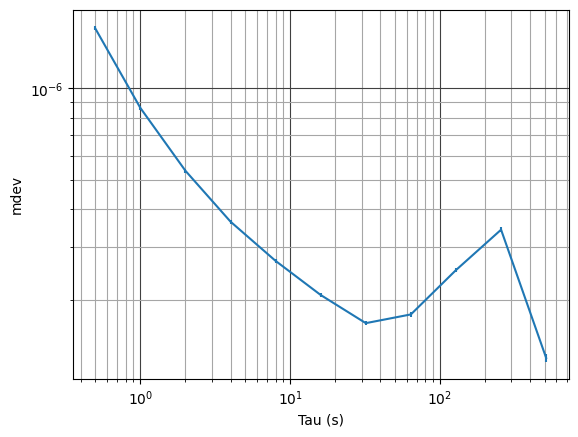

In [8]:
f_name='hp34970_7v.pkl'
f=d.fast_file()
data_set= f.load (f_name)
data_set[0] = data_set[10] #first sample is alway wrong . Overwrite it
Fs = 2
len = data_set.size
print ('Sigma=',np.std(data_set),'Begin=',data_set[1],'End=',data_set[len-1],'  len=',len)
# Compute a deviation using the Dataset class
a = allantools.Dataset(data=data_set, rate=2.0, data_type='freq')
a.compute("mdev")
# New in 2019.7 : write results to file
#a.write_result("output.dat")
# Plot it using the Plot class
b = allantools.Plot()
# New in 2019.7 : additional keyword arguments are passed to
# matplotlib.pyplot.plot()
b.plot(a, errorbars=True, grid=True)
# You can override defaults before "show" if needed
b.ax.set_xlabel("Tau (s)")
b.show()

In [18]:
print(data_set[0])

1.0
